In [1]:
# Cell 0: Load dataset from Google Drive (your exact location)

file_path = "Cardiovascular_Disease_Dataset.csv"

import pandas as pd
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [2]:
# Cell 1: Imports & global settings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
    classification_report
)

import warnings
warnings.filterwarnings("ignore")

# Plot settings
%matplotlib inline
sns.set(style="whitegrid", context="talk")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [3]:
# Cell 2: Quick look at dataset already loaded in df

print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())

print("\nFirst 5 rows:")
display(df.head())

Shape of dataset: (1000, 14)

Columns:
 ['patientid', 'age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels', 'target']

First 5 rows:


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [4]:
# Cell 3: Info and descriptive statistics

print("Dataset info:")
print(df.info())

print("\nSummary statistics of numeric columns:")
display(df.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB
None

Summary statistics of numeric columns:


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [5]:
# Cell 4: Check missing values and duplicates

print("Missing values in each column:")
print(df.isnull().sum())

num_duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", num_duplicates)

if num_duplicates > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates dropped. New shape:", df.shape)
else:
    print("No duplicate rows found.")

Missing values in each column:
patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

Number of duplicate rows: 0
No duplicate rows found.


Target value counts:
target
1    580
0    420
Name: count, dtype: int64


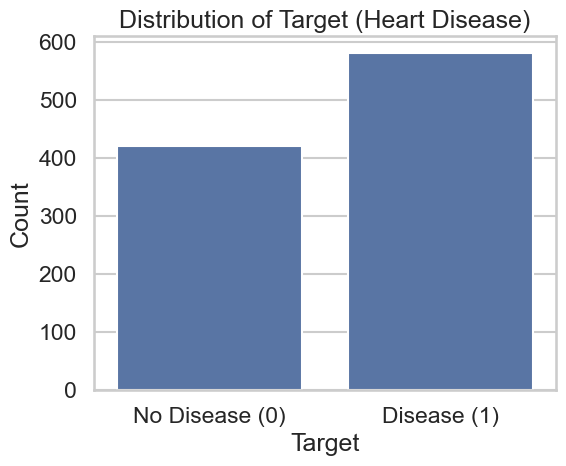


Target percentage distribution (%):
target
1    58.0
0    42.0
Name: proportion, dtype: float64


In [6]:
# Cell 5: Target distribution (0 = No Disease, 1 = Disease)

target_col = "target"

print("Target value counts:")
print(df[target_col].value_counts())

plt.figure(figsize=(6, 5))
sns.countplot(x=target_col, data=df)
plt.title("Distribution of Target (Heart Disease)")
plt.xticks([0, 1], ["No Disease (0)", "Disease (1)"])
plt.xlabel("Target")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

target_percent = df[target_col].value_counts(normalize=True) * 100
print("\nTarget percentage distribution (%):")
print(target_percent.round(2))

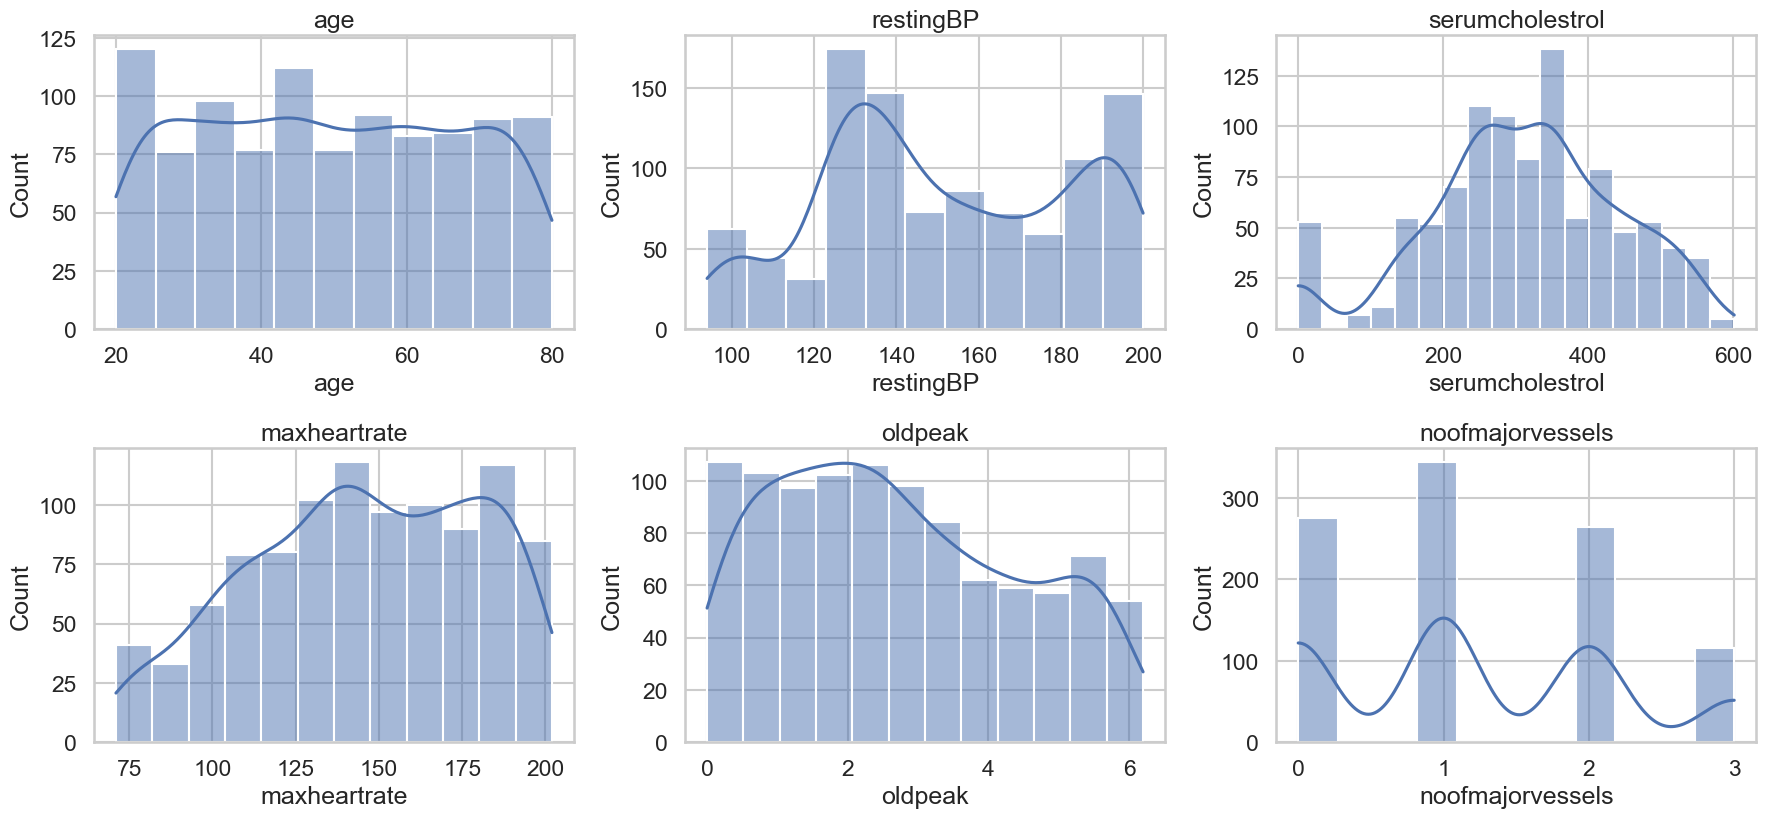

In [7]:
# Cell 6: Histograms of numeric features

numeric_cols = [
    "age",
    "restingBP",
    "serumcholestrol",
    "maxheartrate",
    "oldpeak",
    "noofmajorvessels"
]

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

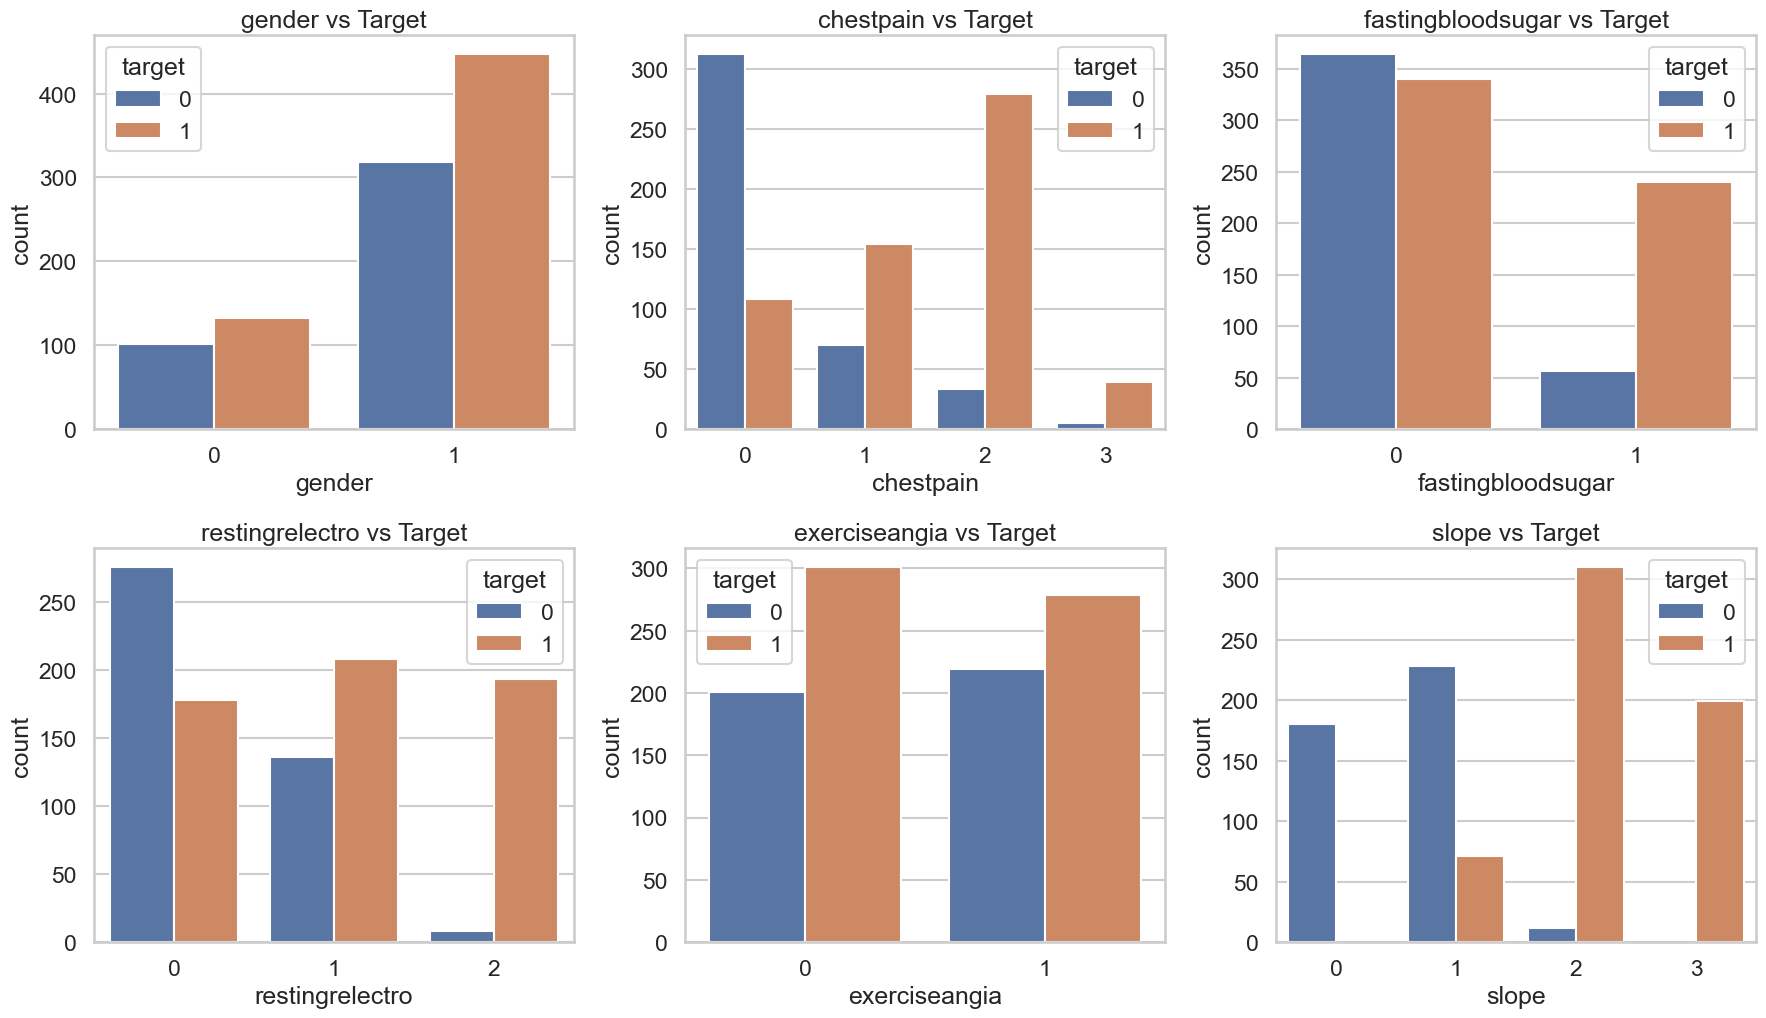

In [8]:
# Cell 7: Countplots of categorical features vs target

categorical_cols = [
    "gender",
    "chestpain",
    "fastingbloodsugar",
    "restingrelectro",
    "exerciseangia",
    "slope"
]

plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue=target_col, data=df)
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()

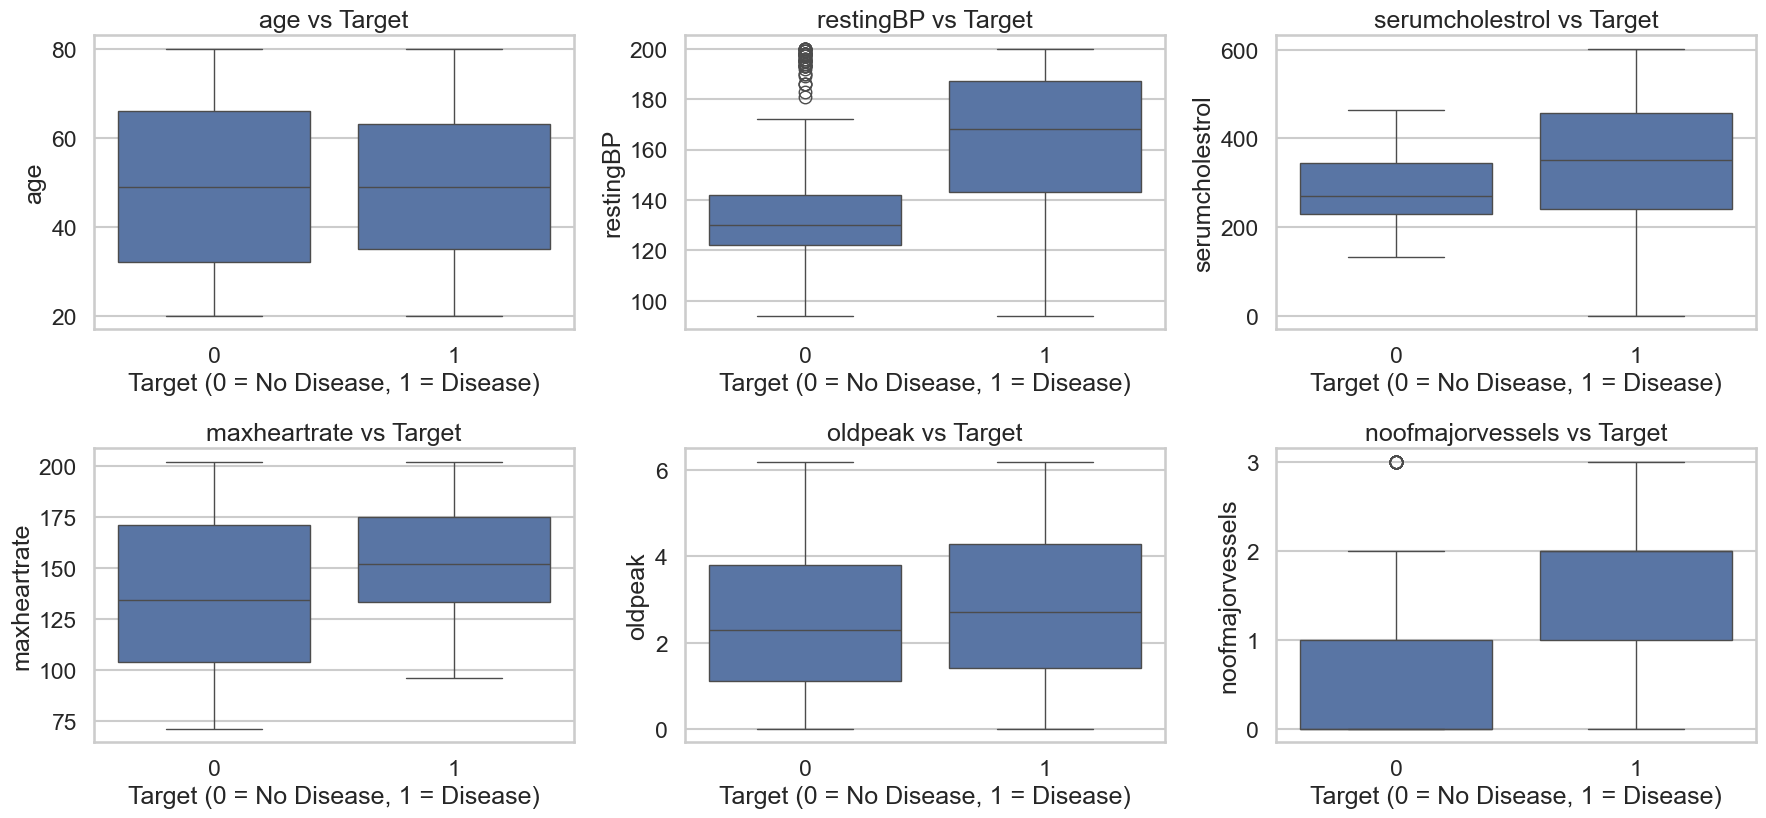

In [9]:
# Cell 8: Boxplots of numeric features vs target

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f"{col} vs Target")
    plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.tight_layout()
plt.show()

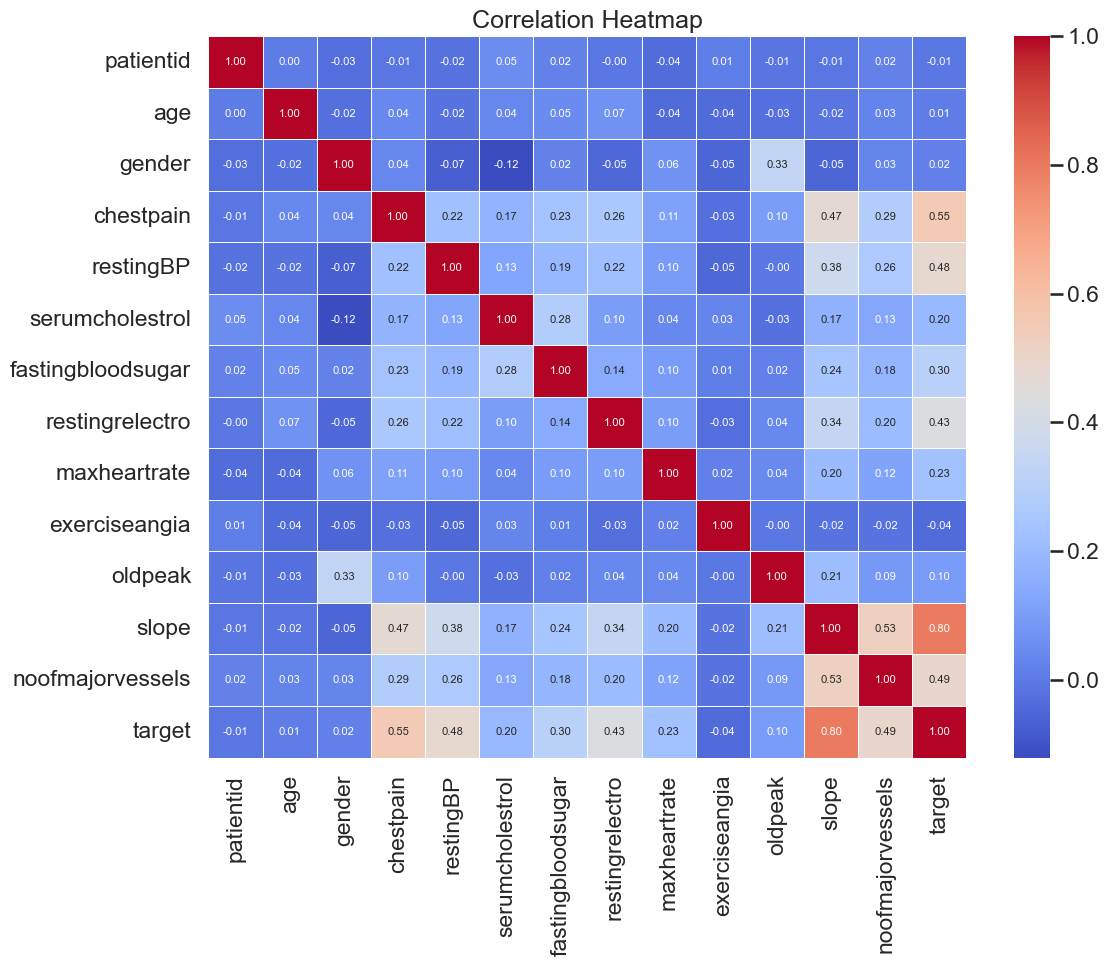

Correlation of features with target:

target               1.000000
slope                0.797358
chestpain            0.554228
noofmajorvessels     0.489866
restingBP            0.482387
restingrelectro      0.426837
fastingbloodsugar    0.303233
maxheartrate         0.228343
serumcholestrol      0.195340
oldpeak              0.098053
gender               0.015769
age                  0.008356
patientid           -0.005637
exerciseangia       -0.039874
Name: target, dtype: float64


In [30]:
# Cell 9: Correlation matrix & heatmap

plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f",  cmap="coolwarm", linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

print("Correlation of features with target:\n")
print(corr["target"].sort_values(ascending=False))

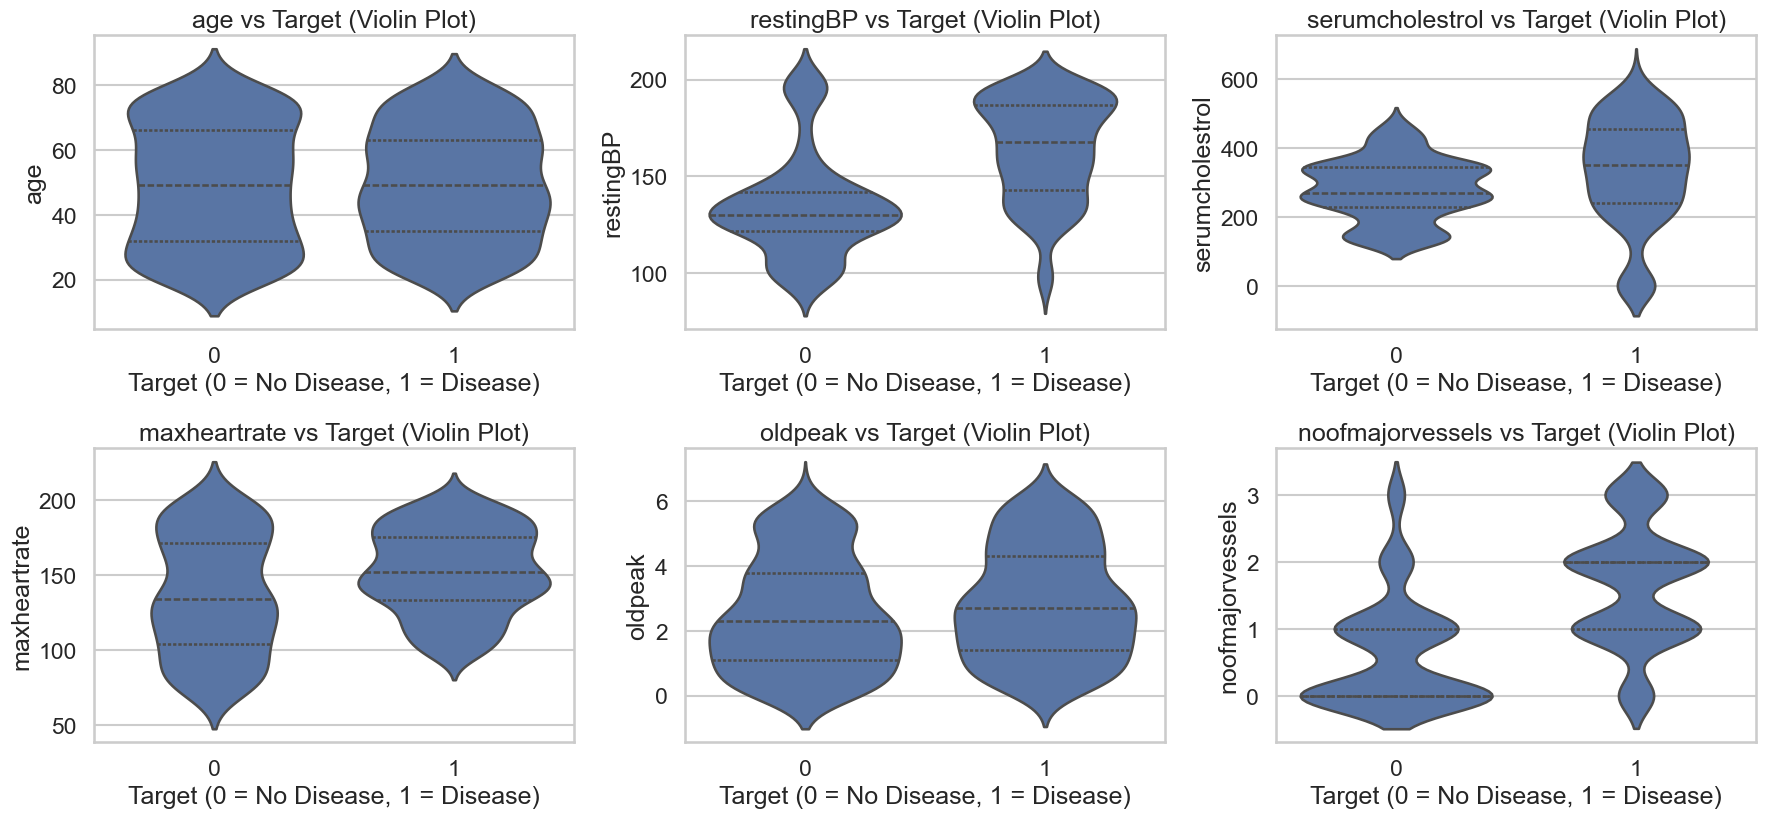

In [11]:
# Cell 10: Violin plots of numeric features vs target

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x=target_col, y=col, data=df, inner="quartile")
    plt.title(f"{col} vs Target (Violin Plot)")
    plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.tight_layout()
plt.show()

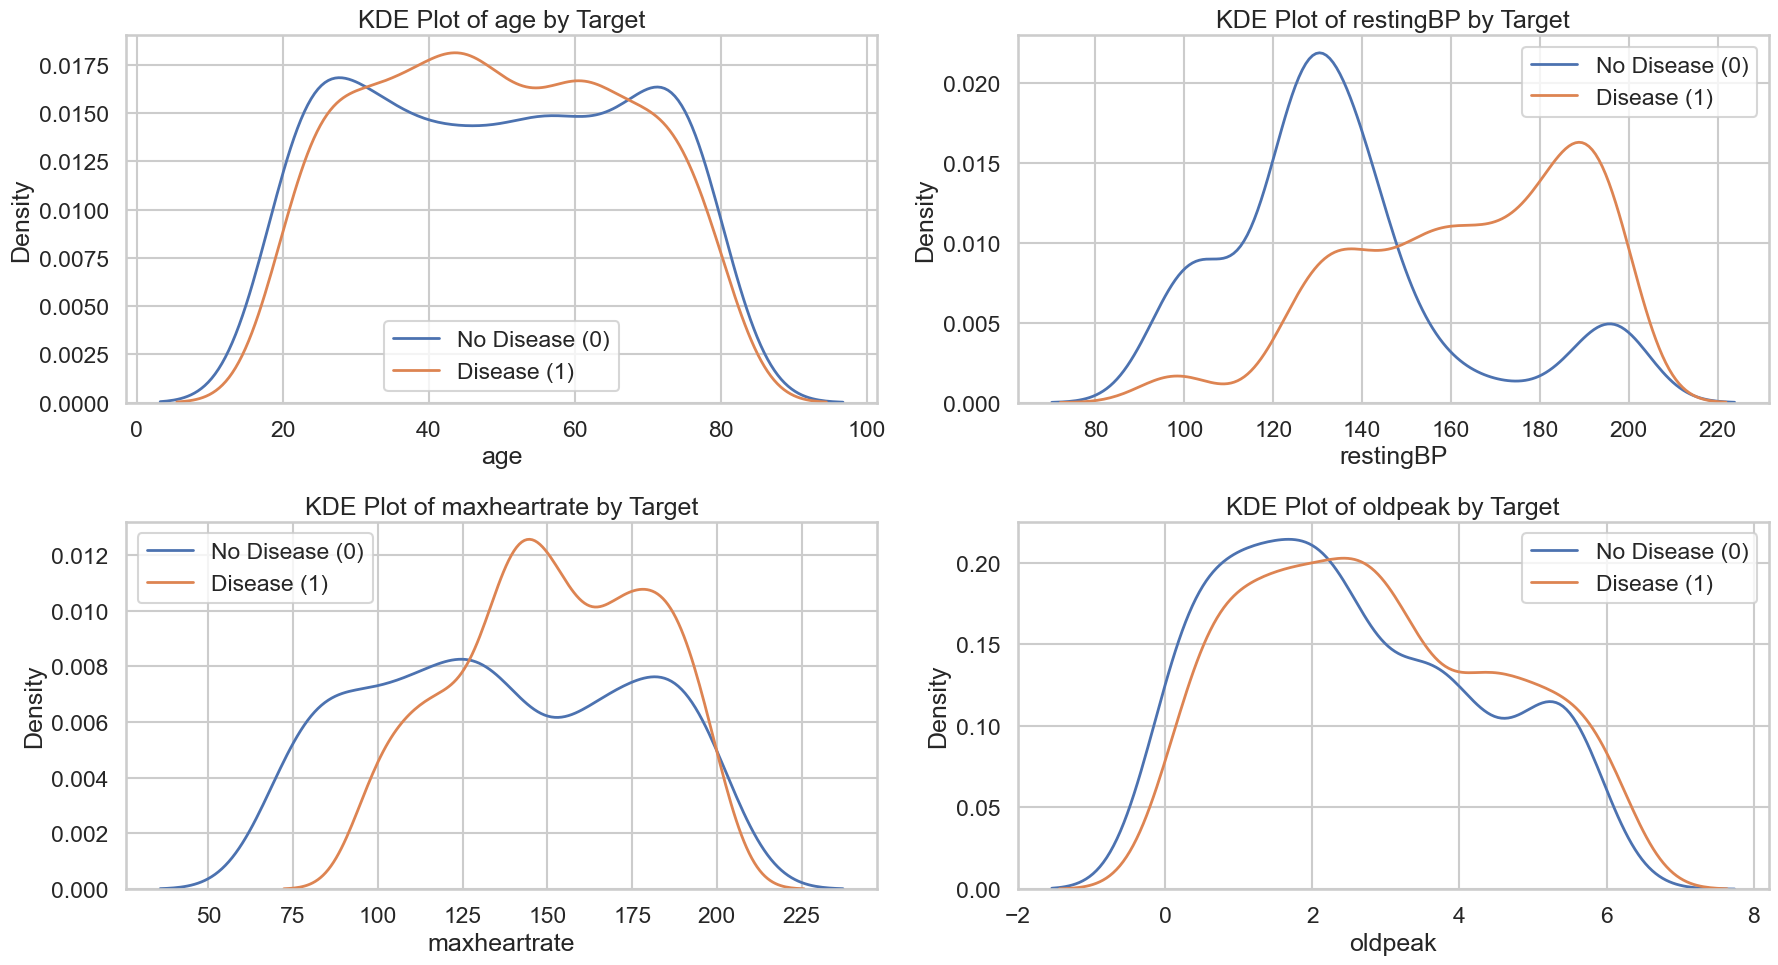

In [12]:
# Cell 11: KDE plots for Disease vs No Disease for selected numeric features

kde_features = ["age", "restingBP", "maxheartrate", "oldpeak"]

plt.figure(figsize=(18, 10))
for i, col in enumerate(kde_features, 1):
    plt.subplot(2, 2, i)
    # KDE for No Disease
    sns.kdeplot(df[df[target_col] == 0][col], label="No Disease (0)", linewidth=2)
    # KDE for Disease
    sns.kdeplot(df[df[target_col] == 1][col], label="Disease (1)", linewidth=2)
    plt.title(f"KDE Plot of {col} by Target")
    plt.xlabel(col)
    plt.legend()
plt.tight_layout()
plt.show()

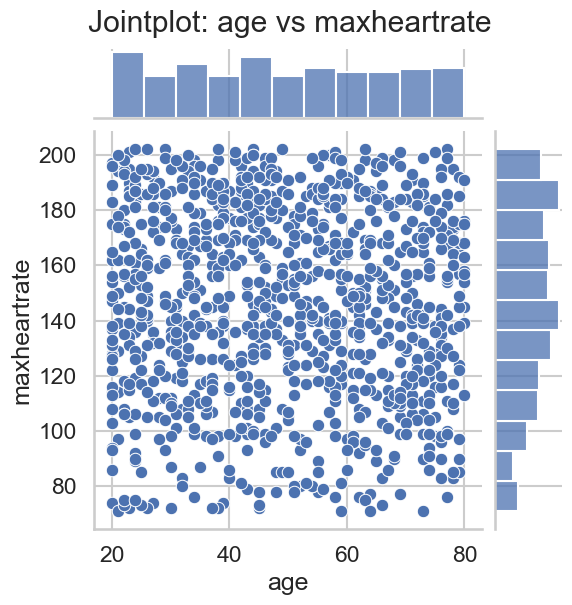

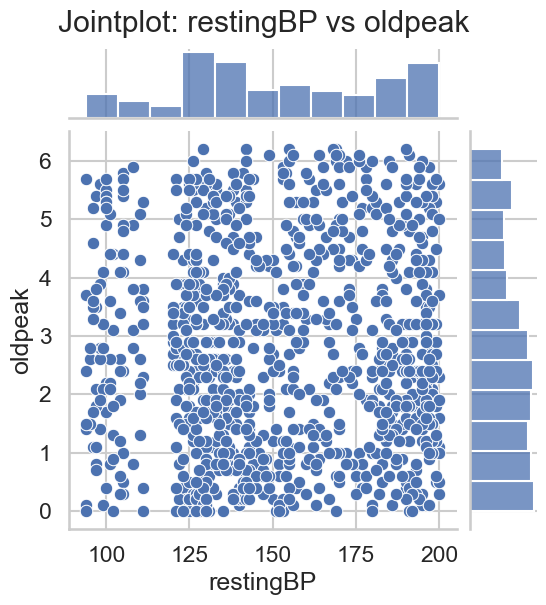

In [13]:
# Cell 12: Jointplots for selected feature pairs

# Jointplot 1: age vs maxheartrate
sns.jointplot(
    data=df,
    x="age",
    y="maxheartrate",
    kind="scatter",
    height=6
)
plt.suptitle("Jointplot: age vs maxheartrate", y=1.02)
plt.show()

# Jointplot 2: restingBP vs oldpeak
sns.jointplot(
    data=df,
    x="restingBP",
    y="oldpeak",
    kind="scatter",
    height=6
)
plt.suptitle("Jointplot: restingBP vs oldpeak", y=1.02)
plt.show()

Top 3 features most correlated with target:
['slope', 'chestpain', 'noofmajorvessels']


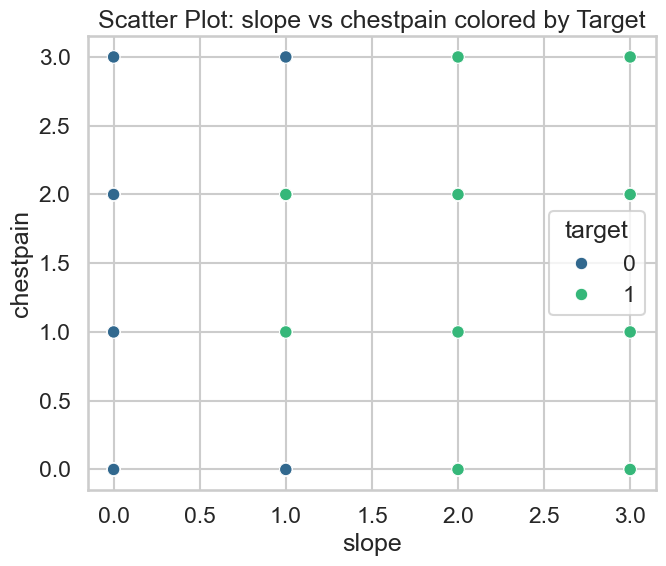

In [14]:
# Cell 13: Scatter plot using top 3 features most correlated with target

corr_with_target = corr["target"].drop("target").abs().sort_values(ascending=False)
top3_features = corr_with_target.index[:3].tolist()

print("Top 3 features most correlated with target:")
print(top3_features)

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df,
    x=top3_features[0],
    y=top3_features[1],
    hue=target_col,
    palette="viridis"
)
plt.title(f"Scatter Plot: {top3_features[0]} vs {top3_features[1]} colored by Target")
plt.tight_layout()
plt.show()

In [15]:
# Cell 14: Define X and y, drop patientid, train-test split

X = df.drop(columns=["patientid", target_col])
y = df[target_col]

print("Feature columns:")
print(X.columns.tolist())

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

print("\nX_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

Feature columns:
['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels']

X_train shape: (800, 12)
X_test shape : (200, 12)
y_train shape: (800,)
y_test shape : (200,)


In [16]:
# Cell 15: Standard scaling for models that need it (Logistic Regression)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Cell 16: Baseline Logistic Regression model

log_reg_base = LogisticRegression(
    max_iter=1000,
    random_state=RANDOM_STATE
)

log_reg_base.fit(X_train_scaled, y_train)

y_pred_log_base = log_reg_base.predict(X_test_scaled)
y_prob_log_base = log_reg_base.predict_proba(X_test_scaled)[:, 1]

acc_log_base = accuracy_score(y_test, y_pred_log_base)
prec_log_base = precision_score(y_test, y_pred_log_base)
rec_log_base = recall_score(y_test, y_pred_log_base)
f1_log_base = f1_score(y_test, y_pred_log_base)

print("Baseline Logistic Regression Performance on Test Set")
print("--------------------------------------------------")
print(f"Accuracy : {acc_log_base:.4f}")
print(f"Precision: {prec_log_base:.4f}")
print(f"Recall   : {rec_log_base:.4f}")
print(f"F1-score : {f1_log_base:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_base))

Baseline Logistic Regression Performance on Test Set
--------------------------------------------------
Accuracy : 0.9850
Precision: 0.9829
Recall   : 0.9914
F1-score : 0.9871

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        84
           1       0.98      0.99      0.99       116

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [18]:
# Cell 17: Baseline Random Forest model

rf_clf_base = RandomForestClassifier(
    n_estimators=200,
    random_state=RANDOM_STATE,
    class_weight="balanced"
)

rf_clf_base.fit(X_train, y_train)

y_pred_rf_base = rf_clf_base.predict(X_test)
y_prob_rf_base = rf_clf_base.predict_proba(X_test)[:, 1]

acc_rf_base = accuracy_score(y_test, y_pred_rf_base)
prec_rf_base = precision_score(y_test, y_pred_rf_base)
rec_rf_base = recall_score(y_test, y_pred_rf_base)
f1_rf_base = f1_score(y_test, y_pred_rf_base)

print("Baseline Random Forest Performance on Test Set")
print("---------------------------------------------")
print(f"Accuracy : {acc_rf_base:.4f}")
print(f"Precision: {prec_rf_base:.4f}")
print(f"Recall   : {rec_rf_base:.4f}")
print(f"F1-score : {f1_rf_base:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_base))

Baseline Random Forest Performance on Test Set
---------------------------------------------
Accuracy : 0.9850
Precision: 0.9829
Recall   : 0.9914
F1-score : 0.9871

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        84
           1       0.98      0.99      0.99       116

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



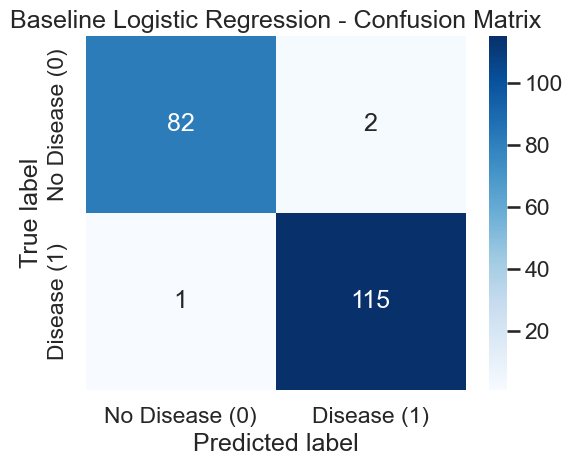

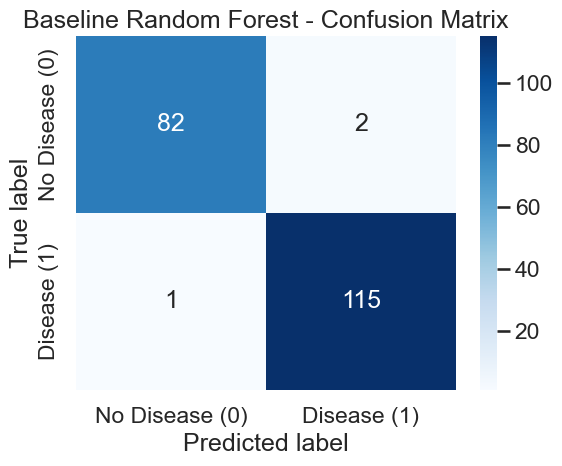

In [19]:
# Cell 18: Confusion matrix helper and plots for baseline models

def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=classes, yticklabels=classes)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Logistic Regression CM
cm_log_base = confusion_matrix(y_test, y_pred_log_base)
plot_confusion_matrix(
    cm_log_base,
    classes=["No Disease (0)", "Disease (1)"],
    title="Baseline Logistic Regression - Confusion Matrix"
)

# Random Forest CM
cm_rf_base = confusion_matrix(y_test, y_pred_rf_base)
plot_confusion_matrix(
    cm_rf_base,
    classes=["No Disease (0)", "Disease (1)"],
    title="Baseline Random Forest - Confusion Matrix"
)

In [20]:
# Cell 19: Advanced Model: Multi-Layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
mlp_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(32, 16),
        activation="relu",
        max_iter=300,
        random_state=RANDOM_STATE
    ))
])

mlp_clf.fit(X_train, y_train)

y_pred_mlp = mlp_clf.predict(X_test)
y_prob_mlp = mlp_clf.predict_proba(X_test)[:, 1]   # for ROC/AUC

acc_mlp = accuracy_score(y_test, y_pred_mlp)
prec_mlp = precision_score(y_test, y_pred_mlp)
rec_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print("MLP Performance on Test Set")
print("---------------------------")
print(f"Accuracy : {acc_mlp:.4f}")
print(f"Precision: {prec_mlp:.4f}")
print(f"Recall   : {rec_mlp:.4f}")
print(f"F1-score : {f1_mlp:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))



MLP Performance on Test Set
---------------------------
Accuracy : 0.9800
Precision: 0.9746
Recall   : 0.9914
F1-score : 0.9829

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98        84
           1       0.97      0.99      0.98       116

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [21]:
# Cell 20: Advanced Model: Support Vector Machine (SVM using RBF kernel)
from sklearn.svm import SVC
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf",
                probability=True,
                random_state=RANDOM_STATE,
                class_weight="balanced"))  # optional but useful if classes are imbalanced
])

svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)
y_prob_svm = svm_clf.predict_proba(X_test)[:, 1]   # for ROC/AUC

acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("SVM Performance on Test Set")
print("---------------------------")
print(f"Accuracy : {acc_svm:.4f}")
print(f"Precision: {prec_svm:.4f}")
print(f"Recall   : {rec_svm:.4f}")
print(f"F1-score : {f1_svm:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Performance on Test Set
---------------------------
Accuracy : 0.9700
Precision: 0.9741
Recall   : 0.9741
F1-score : 0.9741

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        84
           1       0.97      0.97      0.97       116

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



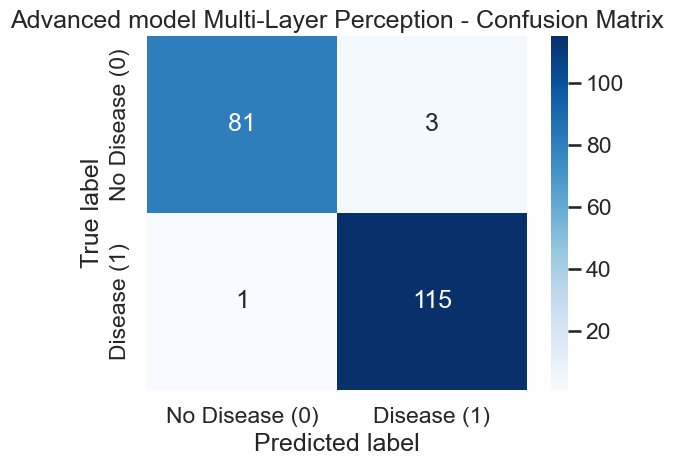

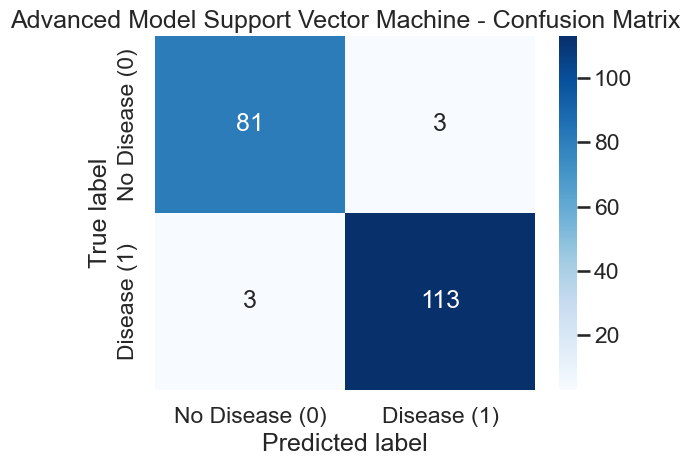

In [22]:
# Cell 21: Confusion matrix helper and plots for Advanced models.

def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=classes, yticklabels=classes)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Logistic Regression CM
cm_log_base = confusion_matrix(y_test, y_pred_mlp)
plot_confusion_matrix(
    cm_log_base,
    classes=["No Disease (0)", "Disease (1)"],
    title="Advanced model Multi-Layer Perception - Confusion Matrix"
)

# Random Forest CM
cm_rf_base = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(
    cm_rf_base,
    classes=["No Disease (0)", "Disease (1)"],
    title="Advanced Model Support Vector Machine - Confusion Matrix"
)

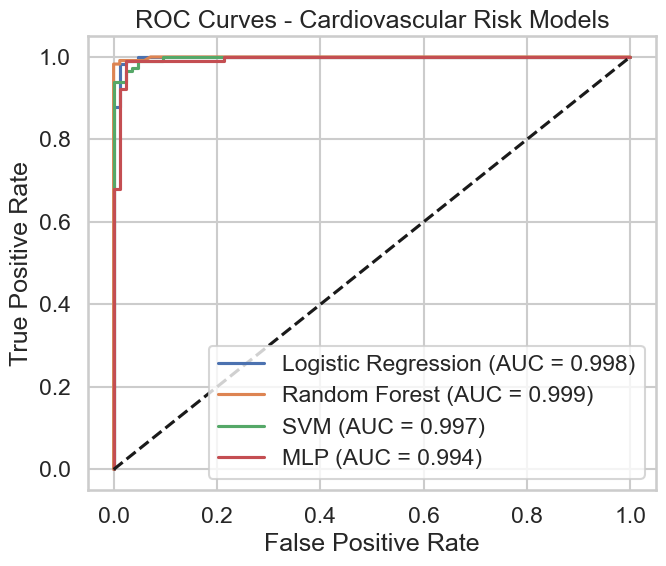

In [23]:
# Cell 22: ROC curves for baseline and advanced models

fpr_log_base, tpr_log_base, _ = roc_curve(y_test, y_prob_log_base)
roc_auc_log_base = auc(fpr_log_base, tpr_log_base)

fpr_rf_base, tpr_rf_base, _ = roc_curve(y_test, y_prob_rf_base)
roc_auc_rf_base = auc(fpr_rf_base, tpr_rf_base)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# --- Plot all ROC curves ---
plt.figure(figsize=(7, 6))

plt.plot(fpr_log_base, tpr_log_base,
         label=f"Logistic Regression (AUC = {roc_auc_log_base:.3f})")

plt.plot(fpr_rf_base, tpr_rf_base,
         label=f"Random Forest (AUC = {roc_auc_rf_base:.3f})")

plt.plot(fpr_svm, tpr_svm,
         label=f"SVM (AUC = {roc_auc_svm:.3f})")

plt.plot(fpr_mlp, tpr_mlp,
         label=f"MLP (AUC = {roc_auc_mlp:.3f})")

plt.plot([0, 1], [0, 1], "k--")  # chance line

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Cardiovascular Risk Models")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


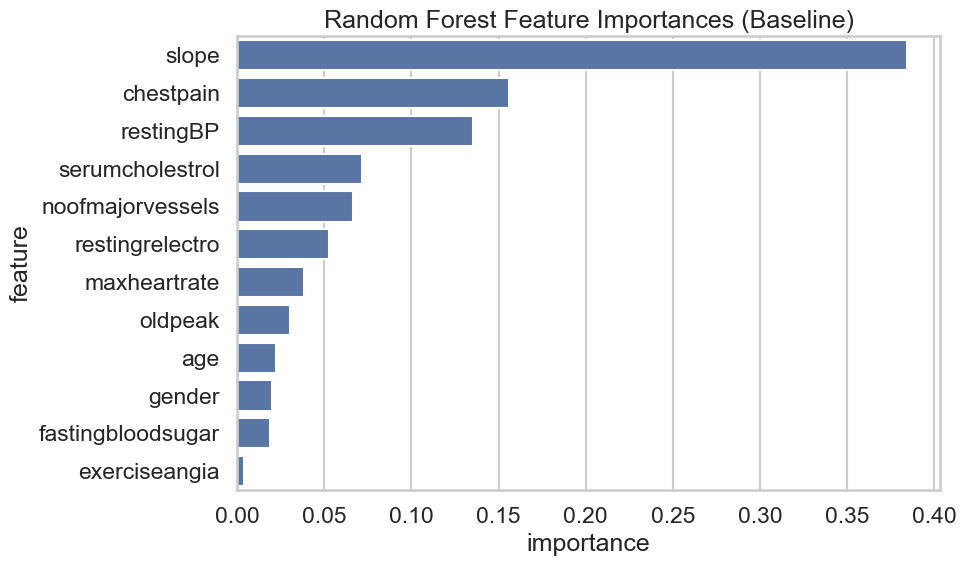

,feature,importance
10,slope,0.384125
2,chestpain,0.155941
3,restingBP,0.135160
4,serumcholestrol,0.071553
11,noofmajorvessels,0.066601
6,restingrelectro,0.052690
7,maxheartrate,0.038458
9,oldpeak,0.030181
0,age,0.022109
1,gender,0.020226


In [24]:
# Cell 23: Feature importances from baseline Random Forest

importances = rf_clf_base.feature_importances_
feature_names = X.columns

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=fi_df)
plt.title("Random Forest Feature Importances (Baseline)")
plt.tight_layout()
plt.show()

display(fi_df)

In [25]:
# Cell 24: Compare baseline and Advanced Model performances

results = pd.DataFrame({
    "Model": [
        "Logistic Regression (Baseline)",
        "Random Forest (Baseline)",
        "Mulit-Layer Perceptron Neural Network",
        "Support Vector Machine"
    ],
    "Accuracy": [
        acc_log_base,
        acc_rf_base,
        acc_mlp,
        acc_svm,
    ],
    "Precision": [
        prec_log_base,
        prec_rf_base,
        prec_mlp, 
        prec_svm,
    ],
    "Recall": [
        rec_log_base,
        rec_rf_base,
        rec_mlp, 
        rec_svm,
    ],
    "F1-score": [
        f1_log_base,
        f1_rf_base,
        f1_mlp, 
        f1_svm,
    ]
})

display(results)

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression (Baseline),0.985,0.982906,0.991379,0.987124
1,Random Forest (Baseline),0.985,0.982906,0.991379,0.987124
2,Mulit-Layer Perceptron Neural Network,0.980,0.974576,0.991379,0.982906
3,Support Vector Machine,0.970,0.974138,0.974138,0.974138


In [26]:
# Cell 25: Choose best model by F1-score and show its metrics clearly

model_metrics = {
    "Logistic Regression (Baseline)": {
        "accuracy": acc_log_base,
        "precision": prec_log_base,
        "recall": rec_log_base,
        "f1": f1_log_base
    },
    "Random Forest (Baseline)": {
        "accuracy": acc_rf_base,
        "precision": prec_rf_base,
        "recall": rec_rf_base,
        "f1": f1_rf_base
    },
     "Multi-Layer Perceptron": {
        "accuracy": acc_mlp,
        "precision": prec_mlp,
        "recall": rec_mlp,
        "f1": f1_mlp
    }, 
     "Support Vector Machine": {
        "accuracy": acc_svm,
        "precision": prec_svm,
        "recall": rec_svm,
        "f1": f1_svm
    }, 

}

best_model_name = None
best_f1 = -1

for name, metrics in model_metrics.items():
    if metrics["f1"] > best_f1:
        best_f1 = metrics["f1"]
        best_model_name = name

print("BEST MODEL BASED ON F1-SCORE:")
print("-----------------------------")
print(f"Model Name : {best_model_name}")
print(f"Accuracy   : {model_metrics[best_model_name]['accuracy']:.4f}")
print(f"Precision  : {model_metrics[best_model_name]['precision']:.4f}")
print(f"Recall     : {model_metrics[best_model_name]['recall']:.4f}")
print(f"F1-score   : {model_metrics[best_model_name]['f1']:.4f}")

BEST MODEL BASED ON F1-SCORE:
-----------------------------
Model Name : Logistic Regression (Baseline)
Accuracy   : 0.9850
Precision  : 0.9829
Recall     : 0.9914
F1-score   : 0.9871


In [27]:
# Cell 26: Prediction helper function using the best model

# Decide which actual model object to use based on best_model_name

if "Random Forest (Baseline)" in best_model_name:
    final_model = rf_clf_base
    final_uses_scaling = False
elif "Multi-Layer Perceptron" in best_model_name:
    final_model = mlp_clf
    final_uses_scaling = False
elif "Support Vector Machine" in best_model_name:
    final_model = svm_clf
    final_uses_scaling = False
else:
    final_model = log_reg_base
    final_uses_scaling = True

def predict_heart_disease(final_model, scaler_obj, input_dict, uses_scaling=True):
    """
    final_model: trained best model
    scaler_obj: StandardScaler fitted on training data (or None)
    input_dict: dictionary of feature_name: value for ONE patient
    uses_scaling: True if model expects scaled input (Logistic), False otherwise
    """
    input_df = pd.DataFrame([input_dict])[X.columns]  # ensure same column order

    if uses_scaling and scaler_obj is not None:
        input_transformed = scaler_obj.transform(input_df)
    else:
        input_transformed = input_df

    prob = final_model.predict_proba(input_transformed)[0, 1]
    pred = final_model.predict(input_transformed)[0]

    return pred, prob

# Example: use first row of X_test as a demo patient
example_patient = X_test.iloc[0].to_dict()
print("Example patient features:")
print(example_patient)

pred_label, pred_prob = predict_heart_disease(
    final_model,
    scaler,
    example_patient,
    uses_scaling=final_uses_scaling
)

print("\nPrediction for example patient (using BEST model):")
print("Predicted label:", pred_label, "(0 = No Disease, 1 = Disease)")
print(f"Predicted probability of Disease: {pred_prob:.4f}")

Example patient features:
{'age': 20.0, 'gender': 0.0, 'chestpain': 1.0, 'restingBP': 143.0, 'serumcholestrol': 432.0, 'fastingbloodsugar': 0.0, 'restingrelectro': 1.0, 'maxheartrate': 113.0, 'exerciseangia': 0.0, 'oldpeak': 1.8, 'slope': 1.0, 'noofmajorvessels': 0.0}

Prediction for example patient (using BEST model):
Predicted label: 0 (0 = No Disease, 1 = Disease)
Predicted probability of Disease: 0.0674
